# Building a USD Libor Dual Curve and Valuing a Swap

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

This follows example mentioned in the blogpost at https://blog.deriscope.com/index.php/en/excel-interest-rate-swap-price-dual-bootstrapping-curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.funding import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  22 Oct 2020 at 22:57 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
valuationDate = FinDate(30, 11, 2018)

## Define IR Swap

Define the swap characteristics

In [4]:
startDate = FinDate(27, 12, 2017)
maturityDate = FinDate(27, 12, 2067)
notional = 10 * ONE_MILLION
swapType = FinSwapTypes.RECEIVER

Set up the fixed leg

In [5]:
fixedRate = 0.0150
fixedDCCType = FinDayCountTypes.THIRTY_360_BOND
fixedFreqType = FinFrequencyTypes.ANNUAL

Set up the floating leg

In [6]:
floatSpread = 0.0
floatDCCType = FinDayCountTypes.ACT_360
floatFreqType = FinFrequencyTypes.SEMI_ANNUAL

In [7]:
offMarketSwap = FinIborSwap(startDate, maturityDate, swapType, 
                            fixedRate, fixedFreqType, fixedDCCType,
                            notional,
                            floatSpread, floatFreqType, floatDCCType)

In [8]:
interpType = FinInterpTypes.LINEAR_ZERO_RATES

## Build a USD Libor Single Curve

In [9]:
depoDCCType = FinDayCountTypes.ACT_360
depos = []

spotDays = 0
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "6M", -0.2510/100.0, depoDCCType); depos.append(depo)

fras = []
fraDCCType = FinDayCountTypes.ACT_360

fra = FinIborFRA(settlementDate.addTenor("1M"), "6M", -0.2450/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("2M"), "6M", -0.2435/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("3M"), "6M", -0.2400/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("4M"), "6M", -0.2360/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("5M"), "6M", -0.2285/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("6M"), "6M", -0.2230/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("7M"), "6M", -0.2110/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("8M"), "6M", -0.1990/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("9M"), "6M", -0.1850/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("10M"), "6M", -0.1680/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("11M"), "6M", -0.1510/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("12M"), "6M", -0.1360/100.0, fraDCCType); fras.append(fra)

swaps = []
swapType = FinSwapTypes.PAYER
fixedDCCType = FinDayCountTypes.THIRTY_360_BOND
fixedFreqType = FinFrequencyTypes.ANNUAL

swap = FinIborSwap(settlementDate, "2Y", swapType, -0.1525/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "3Y", swapType, -0.0185/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "4Y", swapType, 0.1315/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "5Y", swapType, 0.2745/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "6Y", swapType, 0.4135/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "7Y", swapType, 0.5439/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "8Y", swapType, 0.6652/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "9Y", swapType, 0.7784/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "10Y", swapType, 0.8799/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "11Y", swapType, 0.9715/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "12Y", swapType, 1.0517/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "15Y", swapType, 1.2369/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "20Y", swapType, 1.3965/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "25Y", swapType, 1.4472/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "30Y", swapType, 1.4585/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "35Y", swapType, 1.4595/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "40Y", swapType, 1.4535/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "45Y", swapType, 1.4410/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "50Y", swapType, 1.4335/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

iborDepos = depos.copy()
iborFras = fras.copy()
iborSwaps = swaps.copy()

In [10]:
iborCurve = FinIborSingleCurve(settlementDate, iborDepos, iborFras, iborSwaps, interpType)

## Swap Valuation

In [11]:
vBloomberg = 388147

In [12]:
v1 = offMarketSwap.value(valuationDate, iborCurve, iborCurve, -0.268/100.0)

In [13]:
print("Single Curve Value: %9.2f  BBG Value:%9.2f"% (v1, vBloomberg))

Single Curve Value: 381271.41  BBG Value:388147.00


In [14]:
print("Error in bps: %9.6f"% ((v1-vBloomberg)/notional*10000))

Error in bps: -6.875594


In Bloomberg, this swap has a value of 388,147.49 - why the difference - BBG uses a Dual Curve.

## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [15]:
depoDCCType = FinDayCountTypes.ACT_360
depos = []

spotDays = 0
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "1D", -0.3490/100.0, depoDCCType); depos.append(depo)

fras = []

swaps = []
swapType = FinSwapTypes.PAYER
fixedDCCType = FinDayCountTypes.ACT_365F
fixedFreqType = FinFrequencyTypes.ANNUAL

# Standard OIS with standard annual terms
swap = FinOIS(settlementDate, "2W", swapType, -0.3600/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "1M", swapType, -0.3560/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "2M", swapType, -0.3570/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "3M", swapType, -0.3580/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "4M", swapType, -0.3575/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "5M", swapType, -0.3578/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "6M", swapType, -0.3580/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "7M", swapType, -0.3600/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "8M", swapType, -0.3575/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "9M", swapType, -0.3569/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "10M", swapType, -0.3553/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "11M", swapType, -0.3534/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "12M", swapType, -0.3496/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "18M", swapType, -0.3173/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

swap = FinOIS(settlementDate, "2Y", swapType, -0.2671/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "30M", swapType, -0.2070/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "3Y", swapType, -0.1410/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "4Y", swapType, -0.0060/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "5Y", swapType, 0.1285/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "6Y", swapType, 0.2590/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "7Y", swapType, 0.3830/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "8Y", swapType, 0.5020/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "9Y", swapType, 0.6140/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "10Y", swapType, 0.7160/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "11Y", swapType, 0.8070/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "12Y", swapType, 0.8890/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "15Y", swapType, 1.0790/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "20Y", swapType, 1.2460/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "25Y", swapType, 1.3055/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "30Y", swapType, 1.3270/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "35Y", swapType, 1.3315/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "40Y", swapType, 1.3300/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "50Y", swapType, 1.3270/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

oisDepos = depos.copy()
oisFras = fras.copy()
oisSwaps = swaps.copy()

In [16]:
oisCurve = FinOISCurve(valuationDate, oisDepos, oisFras, oisSwaps, interpType)

## Building the Dual Curve

In [17]:
iborSingleCurve = FinIborSingleCurve(settlementDate, iborDepos, iborFras, iborSwaps, interpType)

In [19]:
iborDualCurve = FinIborDualCurve(settlementDate, oisCurve, iborDepos, iborFras, iborSwaps, interpType)

Let's look at the short end

In [20]:
v2 = offMarketSwap.value(valuationDate, oisCurve, iborDualCurve, -0.268/100.0)

In [21]:
print("Two Curve Value: %9.2f  BBG Value:%9.2f"% (v2, vBloomberg))

Two Curve Value: 387290.77  BBG Value:388147.00


In [22]:
print("Error in bps: %9.6f"% ((v2-vBloomberg)/notional*10000))

Error in bps: -0.856229


## Single vs Dual Curve

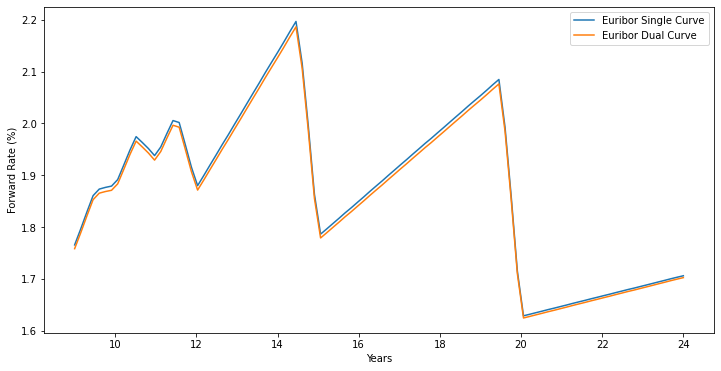

In [23]:
years = np.linspace(9, 24, 100)
dates = valuationDate.addYears(years)

iborSingleCurveFwds = iborSingleCurve.fwdRate(dates, "6M")    
iborDualCurveFwds = iborDualCurve.fwdRate(dates, "6M")

plt.figure(figsize=(12,6))
plt.plot(years, iborSingleCurveFwds*100.0, label="Euribor Single Curve")
plt.plot(years, iborDualCurveFwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

I calculate the difference between the two curves.

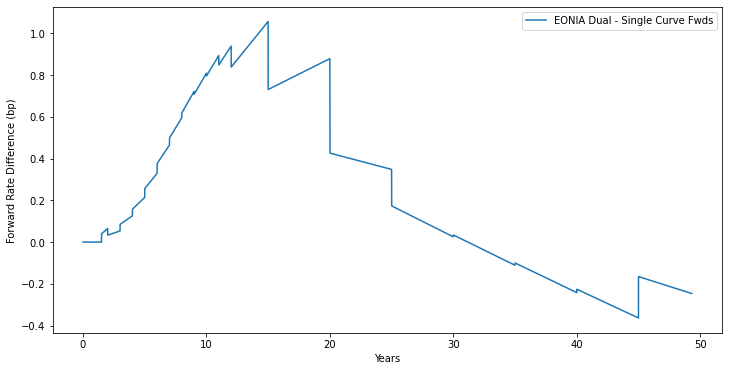

In [24]:
dayMax = 50*360
years = np.linspace(0, dayMax/365, dayMax)
dates = valuationDate.addYears(years)

liborSingleCurveFwds = iborSingleCurve.fwd(dates)    
liborDualCurveFwds = iborDualCurve.fwd(dates)

diff = liborSingleCurveFwds - liborDualCurveFwds

plt.figure(figsize=(12,6))
plt.plot(years, diff*10000.0, label="EONIA Dual - Single Curve Fwds")
plt.xlabel("Years")
plt.ylabel("Forward Rate Difference (bp)")
plt.legend();

Copyright (c) Dominic O'Kane 2020